# Import libraries


In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [18]:
training_data=[]
DATADIR = "garbage_classification"
Categories = ["paper","plastic","metal"]
def create_training_data():
    for category in Categories:
        path=os.path.join(DATADIR,category)
        class_num = Categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(100,100))
                training_data.append([new_array,class_num])
            except:
                pass

create_training_data()
print (len(training_data))
random.shuffle(training_data)

12731


In [19]:
X=[]
y=[]

for features,label in training_data:
    X.append(features)
    y.append(label)
X= np.array(X).reshape(-1,100,100, 3)


In [20]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)
pickle_in=open("y.pickle","rb")
y=pickle.load(pickle_in)
X = X/255.0


# Model

In [21]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X.shape[1:]),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
    
])



In [22]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["accuracy"])

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical format
y_categorical = to_categorical(y, num_classes=3)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Training the model
model.fit(X_train, y_train, epochs=5,batch_size=64)

Epoch 1/5
160/160 [==============================] - 28s 167ms/step - loss: 1.1721 - accuracy: 0.5459
Epoch 2/5
160/160 [==============================] - 27s 170ms/step - loss: 0.7748 - accuracy: 0.6717
Epoch 3/5
160/160 [==============================] - 27s 170ms/step - loss: 0.6476 - accuracy: 0.7375
Epoch 4/5
160/160 [==============================] - 28s 177ms/step - loss: 0.5809 - accuracy: 0.7741
Epoch 5/5
160/160 [==============================] - 29s 178ms/step - loss: 0.4773 - accuracy: 0.8184


In [24]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [25]:
model.fit(X_train, y_train, epochs=5,batch_size=64)


Epoch 1/5
160/160 [==============================] - 30s 172ms/step - loss: 0.4733 - accuracy: 0.8233
Epoch 2/5
160/160 [==============================] - 27s 170ms/step - loss: 0.3939 - accuracy: 0.8504
Epoch 3/5
160/160 [==============================] - 30s 190ms/step - loss: 0.3192 - accuracy: 0.8827
Epoch 4/5
160/160 [==============================] - 28s 175ms/step - loss: 0.2627 - accuracy: 0.9058
Epoch 5/5
160/160 [==============================] - 28s 174ms/step - loss: 0.2246 - accuracy: 0.9203


In [26]:
model.evaluate(X_test,y_test)

80/80 [==============================] - 3s 34ms/step - loss: 0.5819 - accuracy: 0.7860


[0.5819259285926819, 0.7860227823257446]

# 

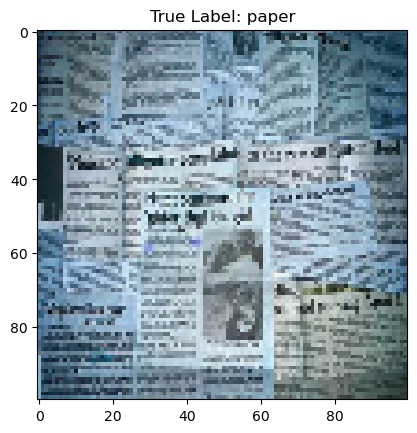

1/1 [==============================] - 0s 202ms/step
[[0.94735205 0.0359974  0.01665056]]
0
Predicted Label: paper


In [27]:
# Select a random index from the test set
random_index = random.randint(0, len(X_test) - 1)

# Get the image and its true label
random_image = X_test[random_index]
true_label = Categories[np.argmax(y_test[random_index])]

# Reshape the image for display
image_for_display = random_image.reshape(100, 100, 3)

# Display the image

plt.imshow(image_for_display)
plt.title(f"True Label: {true_label}")
plt.show()

# Make prediction on the selected image
prediction = model.predict(np.expand_dims(random_image, axis=0))
print(prediction)
print(np.argmax(prediction))
predicted_label = Categories[np.argmax(prediction)]
print(f"Predicted Label: {predicted_label}")


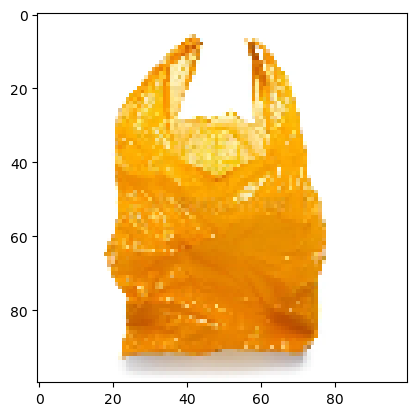

1/1 [==============================] - 0s 21ms/step
plastic


In [28]:
image_path="test3.webp"
img1 = cv2.imread(image_path)

img_array1 = cv2.resize(img1, (100, 100))  # Resize the image to match the model's expected sizing
img_array1 = np.expand_dims(img_array1, axis=0)  # Add batch dimension
img_array1 = img_array1 / 255.0  # Normalize pixel values to between 0 and 1
image_for_display = img_array1.reshape(100, 100, 3)

# Display the image
plt.imshow(image_for_display)
plt.show()

# Make predictions
predictions = model.predict(img_array1)

predicted_label = Categories[np.argmax(predictions)]  # Assuming 'Categories' is defined in your code

# Display the image and prediction
print(predicted_label)


In [29]:
# model.save("new_trashbot.h5")

In [30]:


# import tensorflow as tf

# # Load the Keras model
# model = tf.keras.models.load_model("new_trashbot.h5")

# # Convert the model
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

# # Save the model
# with open('new_model.tflite', 'wb') as f:
#     f.write(tflite_model)


Epoch 1/5
160/160 [==============================] - 28s 172ms/step - loss: 0.2270 - accuracy: 0.9193
Epoch 2/5
160/160 [==============================] - 27s 167ms/step - loss: 0.1579 - accuracy: 0.9430
Epoch 3/5
160/160 [==============================] - 30s 185ms/step - loss: 0.1324 - accuracy: 0.9541
Epoch 4/5
160/160 [==============================] - 29s 179ms/step - loss: 0.1708 - accuracy: 0.9423
Epoch 5/5
80/80 [==============================] - 2s 30ms/step
Confusion Matrix:
[[979  11   5]
 [356 465  14]
 [324  31 362]]


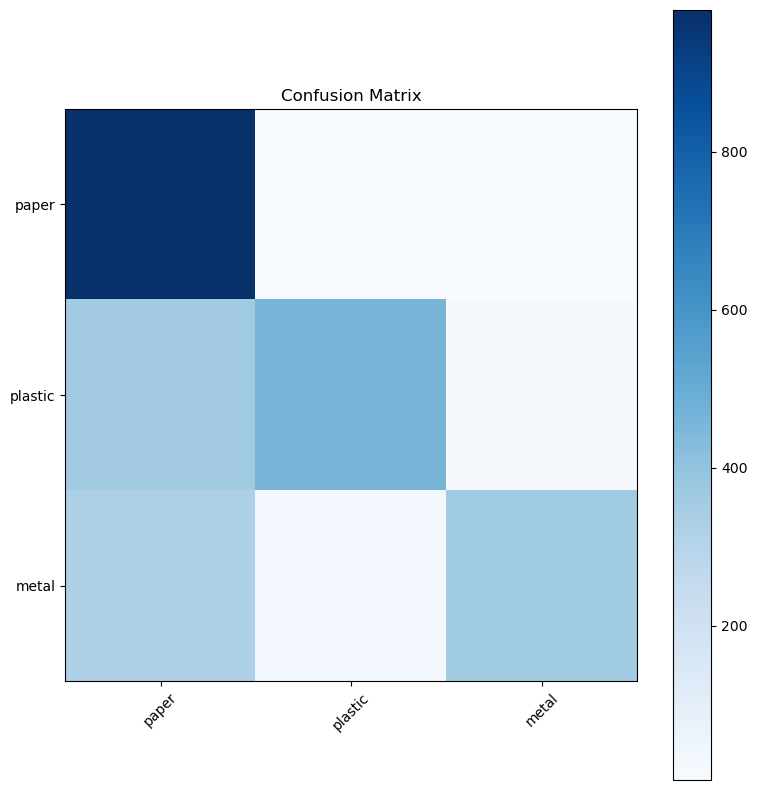

In [31]:
from sklearn.metrics import confusion_matrix

# Train the model (assuming you haven't already trained it three times)
model.fit(X_train, y_train, epochs=5, batch_size=64)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Convert predicted categories to one-hot encoded labels (for confusion matrix)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix (optional)
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(Categories))
plt.xticks(tick_marks, Categories, rotation=45)
plt.yticks(tick_marks, Categories)
plt.tight_layout()
plt.show()
